**Comparison of the Accuracy of Classification algorithms**

**AIM:** To write a python script to implement Decision Tree Classification, gaussian Naive bayes & KNN Classification to predict whether the student will be placed or not and to also compare the accuracy of various classification algorithms that are previously implemented.

**IMPLEMENTATION:**

In [11]:
# import the required libraries
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
%matplotlib inline

/usr/local/lib/python3.6/dist-packages/ipykernel_launcher.py:9: UserWarning: To output multiple subplots, the figure containing the passed axes is being cleared
  if __name__ == '__main__':


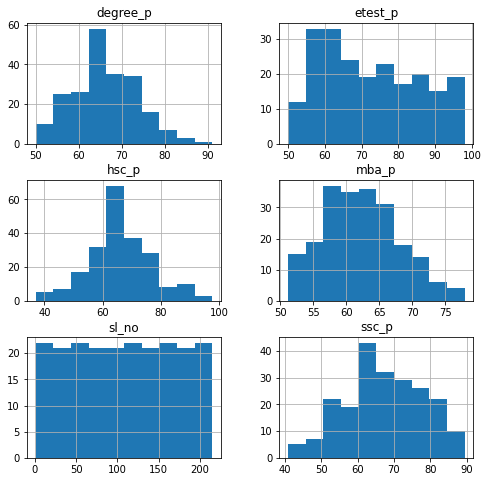

In [12]:
# read the data from the csv file and visualise them
data=pd.read_csv('dataset.csv')

# data.info
# data.dtypes

data=data.drop(['salary'],axis=1)
fig = plt.figure(figsize = (8,8))
ax = fig.gca()
data.hist(ax=ax)
plt.show()

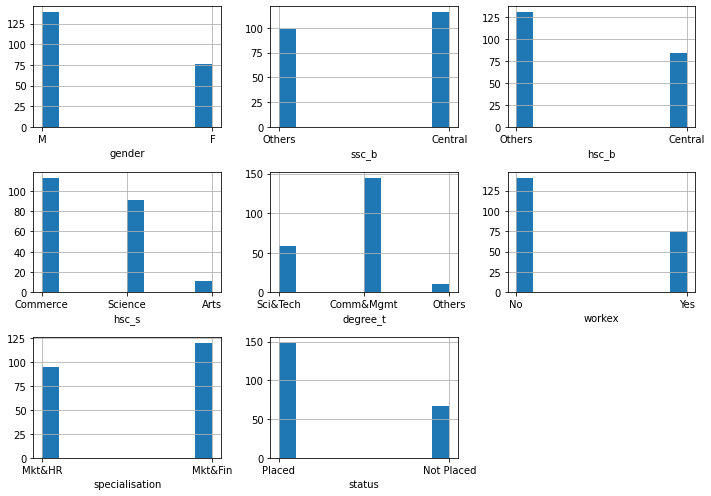

In [13]:
fig = plt.figure(figsize=(10,7))
objList = data.select_dtypes(include = "object").columns
for pos in range(1,len(objList)+1):
    axes = fig.add_subplot(3,3, pos)
    axes.set_xlabel(objList[pos-1])
    axes.hist(data[objList[pos-1]])
    axes.grid(True)
plt.tight_layout()
plt.show()

In [14]:
# Comparing the performance of classification algorithms
from sklearn.preprocessing import LabelEncoder
enc=LabelEncoder()
objList = data.select_dtypes(include = "object").columns
print(objList)
for i in objList:
  data[i]=enc.fit_transform(data[i].astype(str))
print(data.dtypes)

data=data.drop(['sl_no'],axis=1)
X=data.iloc[:,:-1].values
y=data.iloc[:,-1].values
print(X[0],y[0])

from sklearn.preprocessing import StandardScaler
std=StandardScaler()
X=std.fit_transform(X)
print(X[0])

from sklearn.model_selection import train_test_split
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2, random_state=42)

from sklearn.model_selection import GridSearchCV
parameters_knn = {'n_neighbors':[3,5,8,10], 'p':[1, 2],'algorithm':('auto', 'ball_tree', 'kd_tree', 'brute'),'leaf_size':[20,30,40,50]}
parameters_dc = {'criterion':['gini','entropy'],'max_depth':[4,5,6,7,8,9,10,11,12,15,20,30,40,50,70,90,120,150]}


from sklearn.tree import DecisionTreeClassifier
from sklearn.naive_bayes import GaussianNB
from sklearn.neighbors import KNeighborsClassifier
knn=KNeighborsClassifier()
model_nb=GaussianNB()
dc=DecisionTreeClassifier()
model_knn=GridSearchCV(knn,parameters_knn)
model_dc=GridSearchCV(dc,parameters_dc)

model_knn.fit(X_train,y_train)
model_nb.fit(X_train,y_train)
model_dc.fit(X_train,y_train)

pred_knn=model_knn.predict(X_test)
pred_nb=model_nb.predict(X_test)
pred_dc=model_dc.predict(X_test)

from sklearn.metrics import accuracy_score
print("\nKNN ",accuracy_score(pred_knn,y_test))
print("Naive Bayes",accuracy_score(pred_nb,y_test))
print("Decision Tree",accuracy_score(pred_dc,y_test))

Index(['gender', 'ssc_b', 'hsc_b', 'hsc_s', 'degree_t', 'workex',
       'specialisation', 'status'],
      dtype='object')
sl_no               int64
gender              int64
ssc_p             float64
ssc_b               int64
hsc_p             float64
hsc_b               int64
hsc_s               int64
degree_p          float64
degree_t            int64
workex              int64
etest_p           float64
specialisation      int64
mba_p             float64
status              int64
dtype: object
[ 1.  67.   1.  91.   1.   1.  58.   2.   0.  55.   1.  58.8] 1
[ 0.73943397 -0.02808697  1.08245885  2.2688123   0.80076299 -0.64195452
 -1.14010225  1.57628354 -0.72444647 -1.29109087  1.12390297 -0.59764672]
KNN  0.7674418604651163
Naive Bayes 0.813953488372093
Decision Tree 0.7209302325581395
